<a href="https://colab.research.google.com/github/MariaCarmelaPascale/Progetto-ML-e-SII/blob/main/Analisi_CervicalCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DOWNLOAD DATASET

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list -s {'cervical'}

ref                                                           title                                            size  lastUpdated          downloadCount  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  
loveall/cervical-cancer-risk-classification                   Cervical Cancer Risk Classification               9KB  2017-08-31 01:02:22          20595  
prahladmehandiratta/cervical-cancer-largest-dataset-sipakmed  Cervical Cancer largest dataset (SipakMed)        6GB  2021-03-12 23:21:45            535  
ofriharel/224-224-cervical-cancer-screening                   224 224 cervical cancer screening               198MB  2020-05-21 00:18:12            560  
leozysibbs/cervical-cancer-dataset                            Cervical Cancer dataset                           9KB  2020-07-26 10:39:56            127  
ravikiran90/cervical-cancer-prediction                        Cervical cance

In [ ]:
! kaggle datasets download ravikiran90/cervical-cancer-prediction

  0% 0.00/31.3k [00:00<?, ?B/s]
100% 31.3k/31.3k [00:00<00:00, 26.5MB/s]


In [ ]:
! unzip cervical-cancer-prediction.zip

Archive:  cervical-cancer-prediction.zip
  inflating: cancer_cervical.csv     
  inflating: cerv_cancer.json        


#PREPARAZIONE DATASET

In [ ]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [ ]:
df = pd.read_csv('cancer_cervical.csv')
df.shape # (rows, columns)

(968, 36)

In [ ]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,0,0


In [ ]:
df.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
963,34,3,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,0,0
964,32,2,19,1,0,0,0,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,0,0
965,25,2,17,0,0,0,0,1,0.08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,1,0
966,33,2,24,2,0,0,0,1,0.08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,0,0
967,29,2,20,1,0,0,0,1,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,0,0,0,0,0,0,0,0


In [ ]:
df.head().T

,0,1,2,3,4
Age,18,15,34,52,46
Number of sexual partners,4,1,1,5,3
First sexual intercourse,15,14,?,16,21
Num of pregnancies,1,1,1,4,4
Smokes,0,0,0,1,0
Smokes (years),0,0,0,37,0
Smokes (packs/year),0,0,0,37,0
Hormonal Contraceptives,0,0,0,1,1
Hormonal Contraceptives (years),0,0,0,3,15
IUD,0,0,0,0,0


In [ ]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
df.replace({'?': np.nan}, inplace=True)

In [ ]:
# numero di valori nulli
df.isna().sum()

Age                                     0
Number of sexual partners              29
First sexual intercourse               10
Num of pregnancies                     70
Smokes                                 16
Smokes (years)                         16
Smokes (packs/year)                    16
Hormonal Contraceptives               122
Hormonal Contraceptives (years)       122
IUD                                   133
IUD (years)                           133
STDs                                  122
STDs (number)                         122
STDs:condylomatosis                   122
STDs:cervical condylomatosis          122
STDs:vaginal condylomatosis           122
STDs:vulvo-perineal condylomatosis    122
STDs:syphilis                         122
STDs:pelvic inflammatory disease      122
STDs:genital herpes                   122
STDs:molluscum contagiosum            122
STDs:AIDS                             122
STDs:HIV                              122
STDs:Hepatitis B                  

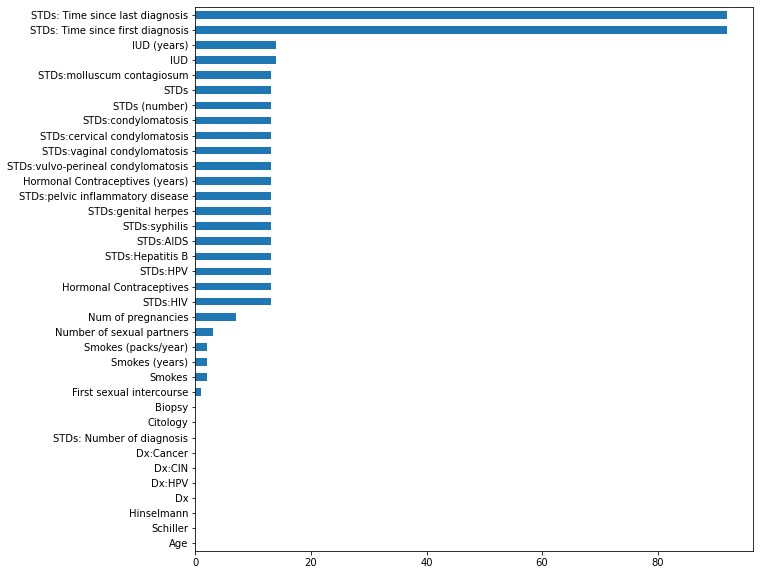

In [ ]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')

In [ ]:
# Eliminazione di  STDs: Time since first diagnosis e STDs: Time since last diagnosis perchè hanno pochissimi valori non nulli
df = df.drop(columns = ['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,34,3,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
964,32,2,19,1,0,0,0,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
965,25,2,17,0,0,0,0,1,0.08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
966,33,2,24,2,0,0,0,1,0.08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 968 non-null    int64 
 1   Number of sexual partners           939 non-null    object
 2   First sexual intercourse            958 non-null    object
 3   Num of pregnancies                  898 non-null    object
 4   Smokes                              952 non-null    object
 5   Smokes (years)                      952 non-null    object
 6   Smokes (packs/year)                 952 non-null    object
 7   Hormonal Contraceptives             846 non-null    object
 8   Hormonal Contraceptives (years)     846 non-null    object
 9   IUD                                 835 non-null    object
 10  IUD (years)                         835 non-null    object
 11  STDs                                846 non-null    object

In [ ]:
# Conversione di tutti i Dtype object in float64 (Dtype object non può essere utilizzato per produrre statistiche) 
df = df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 968 non-null    int64  
 1   Number of sexual partners           939 non-null    float64
 2   First sexual intercourse            958 non-null    float64
 3   Num of pregnancies                  898 non-null    float64
 4   Smokes                              952 non-null    float64
 5   Smokes (years)                      952 non-null    float64
 6   Smokes (packs/year)                 952 non-null    float64
 7   Hormonal Contraceptives             846 non-null    float64
 8   Hormonal Contraceptives (years)     846 non-null    float64
 9   IUD                                 835 non-null    float64
 10  IUD (years)                         835 non-null    float64
 11  STDs                                846 non-n

In [ ]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,968.000000,939.000000,958.000000,898.000000,952.000000,952.000000,952.000000,846.000000,846.000000,835.000000,835.000000,846.000000,846.000000,846.000000,846.0,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.0,846.000000,846.000000,846.000000,968.000000,968.000000,968.000000,968.00000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,26.880165,2.554846,16.963466,2.237194,0.147059,1.266903,0.447420,0.637116,2.220088,0.110180,0.497772,0.104019,0.173759,0.056738,0.0,0.004728,0.055556,0.022459,0.002364,0.001182,0.001182,0.0,0.023641,0.001182,0.004728,0.085744,0.024793,0.011364,0.02376,0.032025,0.039256,0.083678,0.051653,0.063017
std,8.375871,1.663584,2.788939,1.442498,0.354351,4.170207,2.149913,0.481116,3.808712,0.313301,1.885021,0.305466,0.556253,0.231477,0.0,0.068639,0.229197,0.148257,0.048593,0.034381,0.034381,0.0,0.152017,0.034381,0.068639,0.298017,0.155575,0.106048,0.15238,0.176157,0.194304,0.277047,0.221440,0.243118
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


#ANALISI

In [ ]:
# Obtain correlation matrix
corr_matrix = df.corr()
corr_matrix

In [ ]:
# Plot the correlation matrix

plt.figure(figsize =(30,30))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [ ]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']
                
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

In [ ]:
#distribuzione dei valori per gli attributi in categorical_df 
for feature in categorical_df:
   sns.factorplot(feature, data = df, kind = 'count')

####alcuni attributi hanno un solo valore distinto, quindi possono essere eliminati: 'STDs:cervical condylomatosis' e 'STDs:AIDS'

In [ ]:
# Eliminazione di STDs: Time since first diagnosis e STDs: Time since last diagnosis perchè hanno pochissimi valori non nulli
df = df.drop(columns = ['STDs:cervical condylomatosis','STDs:AIDS'])
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum',
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

KeyError: ignored

####alcuni attributi hanno pochissimi valori positivi, quindi possono essere eliminati: 'STDs:Hepatitis B', 'STDs:HPV', 'STDs:molluscum contagiosum', 'STDs:pelvic inflammatory disease', 'STDs:vaginal condylomatosis'

In [ ]:
attNull = ['STDs:genital herpes', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs:molluscum contagiosum', 'STDs:pelvic inflammatory disease', 'STDs:vaginal condylomatosis']

si calcolano le percentuali di 0 e 1 per questi attributi

In [ ]:
def value(df, v):
  v_0 = len(df[df['%s' % v] == 0])
  v_1 = len(df[df['%s' % v] == 1])

  labelsTestName = ['val_0 = %s' % v_0, 'val_1 = %s' % v_1]
  sizesTestName = [v_0, v_1]

  plt.rcParams['figure.figsize'] = (7,7)
  plt.pie(sizesTestName, 
          radius=0.7, 
          startangle = 0,
          colors=['steelblue', 'orange'],
          autopct='%.2f%%', 
          textprops={'fontsize': 13.5},
          pctdistance=0.69)
  plt.legend(labelsTestName, loc=(0.85, 0.7), fontsize = 15)
  plt.title('%s' % v, fontsize = 25)
  plt.show()

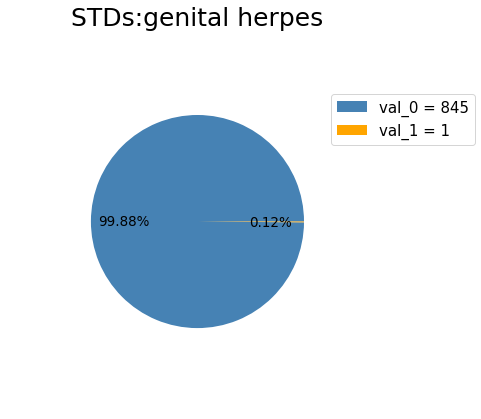

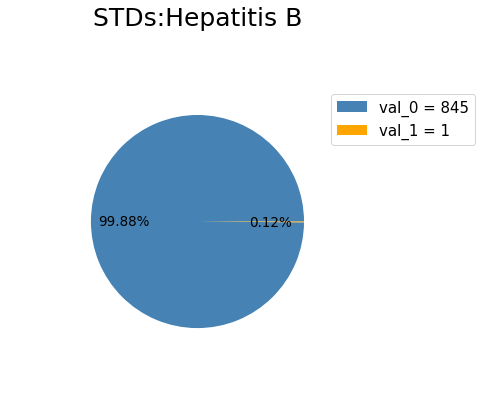

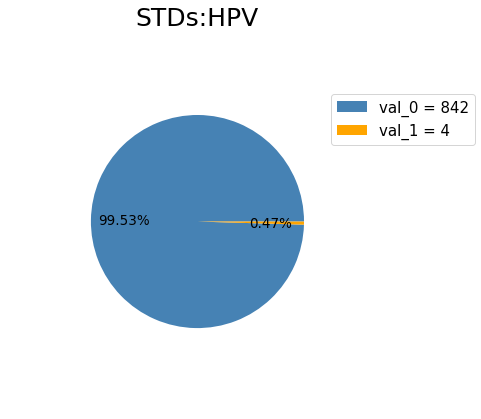

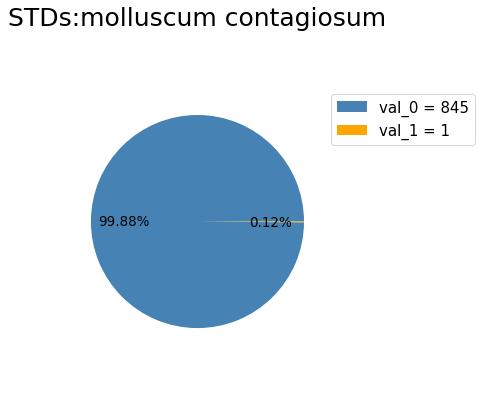

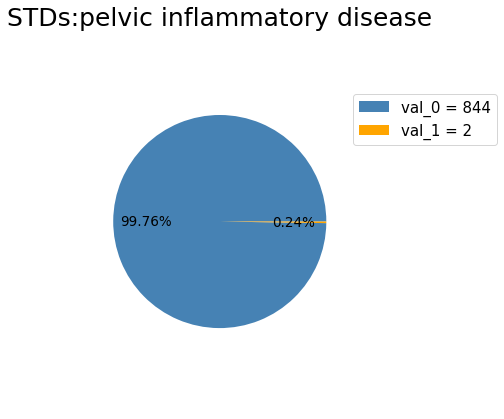

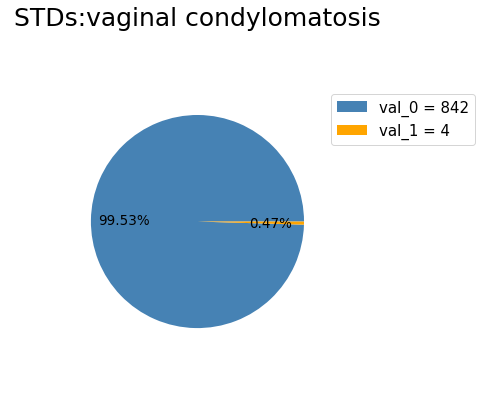

In [ ]:
for v in attNull:
   value(df, v)

i 6 attributi hanno tutti percentuali di valori positivi molto bassi (inferiori allo 0.5%)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/pyt

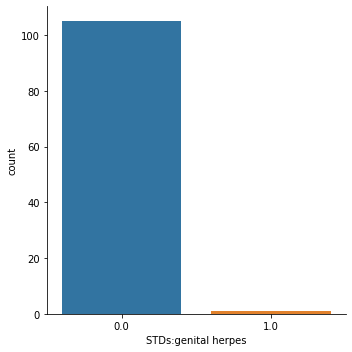

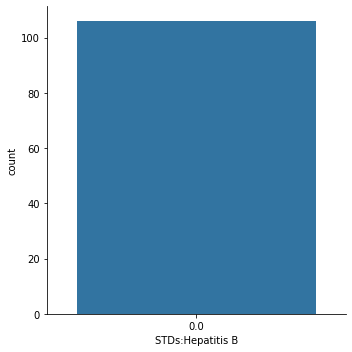

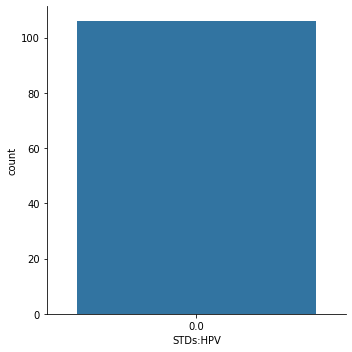

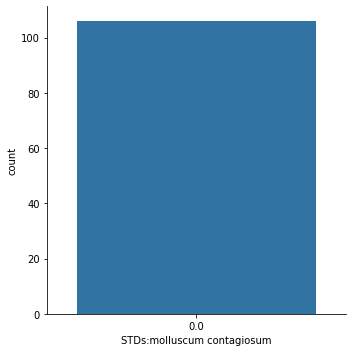

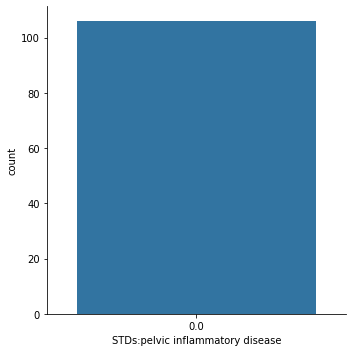

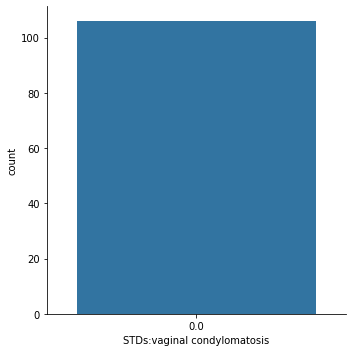

In [ ]:
#distribuzione dei valori per gli attributi in categorical_df con almeno un test positivo
for feature in attNull:
   sns.factorplot(feature, data = df[(df['Hinselmann'] == 1) | (df['Schiller'] == 1) | (df['Citology'] == 1) | (df['Biopsy'] == 1)], kind = 'count')

inoltre, per i record in cui si ha almeno un test positivo, cinque di questi 6 attributi hanno un solo valore distinto.
Non costituendo quindi un'informazione fondamentale, possono essere rimossi.

In [ ]:
# Eliminazione di STDs: Time since first diagnosis e STDs: Time since last diagnosis perchè hanno pochissimi valori non nulli
df = df.drop(columns = ['STDs:Hepatitis B', 'STDs:HPV', 'STDs:molluscum contagiosum', 'STDs:pelvic inflammatory disease', 'STDs:vaginal condylomatosis'])
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis', 'STDs:vulvo-perineal condylomatosis', 
                  'STDs:syphilis', 'STDs:genital herpes', 'STDs:HIV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

###1) Age e Abitudini Sessuali vs Biopsy
'Number of sexual partners': numero totale dei parter sessuali avuti dalla paziente

'First sexual intercourse': l'eta in cui la paziente ha avuto il suo primo rapporto sessuale

'Num of pregnancies': numero totale di gravidanze avute dalla paziente

In [ ]:
df1 = df
df1['Cervical Cancer'] = df1['Hinselmann'] + df1['Schiller'] + df1['Citology'] + df1['Biopsy']

#Per migliorare la predizione si sostituisce il valore di Cervical Cancer con 1 quando il valore è > 0
df1['Cervical Cancer']=np.where(df1['Cervical Cancer']>0,1,df1['Cervical Cancer'])

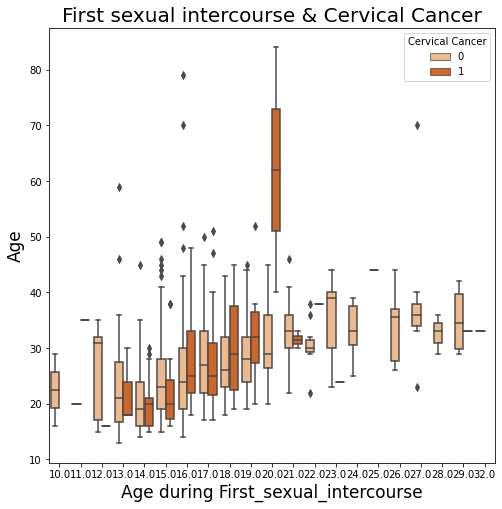

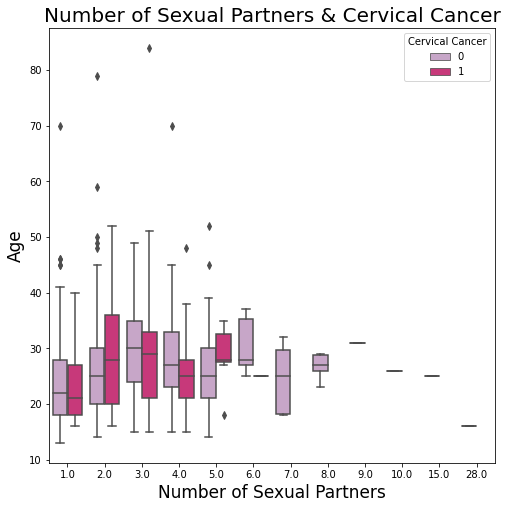

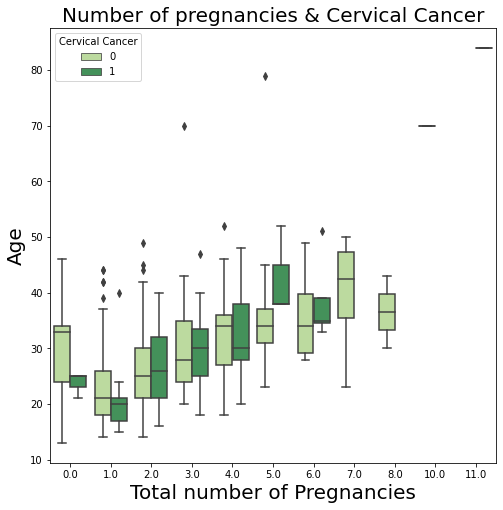

In [ ]:
# 1° grafico: rapporto tra 'First sexual intercourse' e Age vs Biopsy
plt.figure(figsize=(8,8))
plt.title('First sexual intercourse & Cervical Cancer',fontsize=20)
order_x = pd.value_counts(df['First sexual intercourse']).sort_index().index
a=sns.boxplot(x=df['First sexual intercourse'],y=df['Age'], hue=df1['Cervical Cancer'], order = order_x, palette='Oranges')
a.set_xlabel("Age during First_sexual_intercourse",fontsize=17)
a.set_ylabel("Age",fontsize=17)
plt.show()

# 2° grafico: rapporto tra 'Number of sexual partners' e Age vs Biopsy
plt.figure(figsize=(8,8))
plt.title('Number of Sexual Partners & Cervical Cancer',fontsize=20)
order_x = pd.value_counts(df['Number of sexual partners']).sort_index().index
a=sns.boxplot(x=df['Number of sexual partners'],y=df['Age'], hue=df1['Cervical Cancer'], order = order_x, palette='PuRd')
a.set_xlabel("Number of Sexual Partners",fontsize=17)
a.set_ylabel("Age",fontsize=17)
plt.show()

# 3° grafico: rapporto tra 'Num of pregnancies' e Age vs Biopsy
plt.figure(figsize=(8,8))
plt.title('Number of pregnancies & Cervical Cancer',fontsize=20)
order_x = pd.value_counts(df['Num of pregnancies']).sort_index().index
a=sns.boxplot(x=df['Num of pregnancies'],y=df['Age'], hue=df1['Cervical Cancer'], order = order_x, palette='YlGn')
a.set_xlabel('Total number of Pregnancies',fontsize=20)
a.set_ylabel("Age",fontsize=20)
plt.show()

*   Coloro che hanno avuto il loro primo rapporto sessuale tra i 15 e i 18 anni sono più inclini a essere risultate positive al test della biopsia e queste sono prevalentemente nella fascia di età compresa tra 20 e 35 anni.
*   Le persone che hanno avuto tra 1 e 3 partner sessuali sono più inclini a essere positive al test della biopsia e sono prevalentemente nella fascia di età compresa tra 20 e 35 anni.
*   Dal terzo grafico, invece, si evince che maggiore è il numero di gravidanze e maggiori sono le possibilità di ottenere un test bioptico positivo.

###2) Smoking e Abitudini Sessuali vs Biopsy
Smokes: indica se la paziente fuma o no

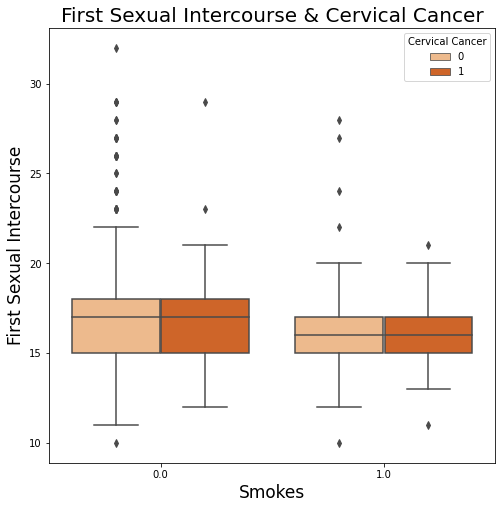

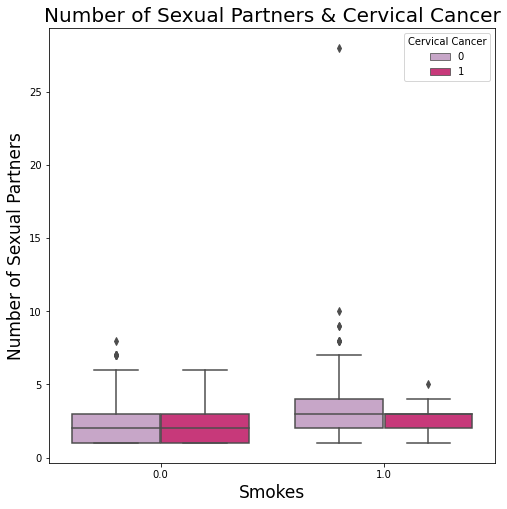

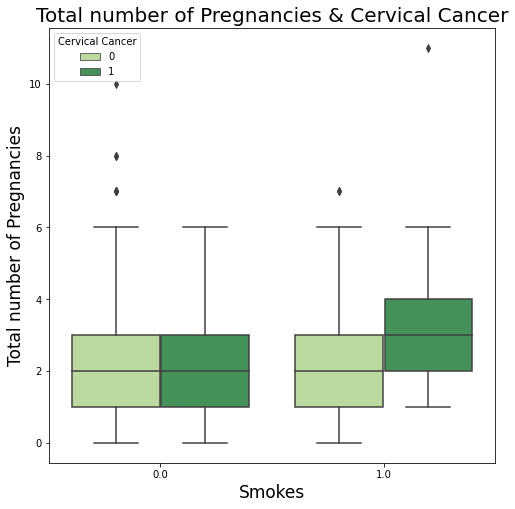

In [ ]:
# 1° grafico: rapporto tra 'First sexual intercourse' e Smokes vs Biopsy
plt.figure(figsize=(8,8))
plt.title("First Sexual Intercourse & Cervical Cancer",fontsize=20)
a=sns.boxplot(y=df['First sexual intercourse'], hue=df1['Cervical Cancer'], x=df['Smokes'], palette='Oranges')
a.set_xlabel("Smokes",fontsize=17)
a.set_ylabel("First Sexual Intercourse",fontsize=17)
plt.show()

# 2° grafico: rapporto tra 'Number of Sexual Partners' e Smokes vs Biopsy
plt.figure(figsize=(8,8))
plt.title('Number of Sexual Partners & Cervical Cancer',fontsize=20)
a=sns.boxplot(y=df['Number of sexual partners'], hue=df1['Cervical Cancer'], x=df['Smokes'], palette='PuRd')
a.set_xlabel("Smokes",fontsize=17)
a.set_ylabel("Number of Sexual Partners",fontsize=17)
plt.show()

# 3° grafico: rapporto tra 'Total number of Pregnancies' e Smokes vs Biopsy
plt.figure(figsize=(8,8))
plt.title("Total number of Pregnancies & Cervical Cancer",fontsize=20)
a=sns.boxplot(y=df['Num of pregnancies'], hue=df1['Cervical Cancer'], x=df['Smokes'],  palette='YlGn')
a.set_xlabel('Smokes',fontsize=17)
a.set_ylabel("Total number of Pregnancies",fontsize=17)
plt.show()

*   Coloro che fumano e hanno avuto il loro primo rapporto sessuale in giovane età (tra i 15 e i 18 anni) sono più inclini a essere risultate positive al test della biopsia
*   Non esiste una chiara relazione tra il fumo e il numero di partner sessuali poiché i malati di cancro che sono fumatori e i pazienti non fumatori hanno entrambi quasi lo stesso numero di partner sessuali
*   La persona che fuma e ha un numero maggiore di gravidanze è più incline a essere risultata positiva al test della biopsia.



###3) Hormonal Contraceptives

In [ ]:
def hormonal2test(df, test_name):
  
  # cont_0: uso di contraccettivi e negativo al test 
  # cont_1: uso di contraccettivi e positivo al test
  cont_0 = len(df[(df['Hormonal Contraceptives'] == 1) & (df['%s' % test_name] == 0)])
  cont_1 = len(df[(df['Hormonal Contraceptives'] == 1) & (df['%s' % test_name] == 1)])

  # notcont_0: non uso di contraccettivi e negativo al test di Hinselmann
  # notcont_1: non uso di contraccettivi e positivo al test di Hinselmann
  notcont_0 = len(df[(df['Hormonal Contraceptives'] == 0) & (df['%s' % test_name] == 0)])
  notcont_1 = len(df[(df['Hormonal Contraceptives'] == 0) & (df['%s' % test_name] == 1)])

  labels = ['0', '1']
  cont = [cont_0, cont_1]
  notcont = [notcont_0, notcont_1]
  x = np.arange(len(labels))  
  # the label locations
  width = 0.30  # the width of the bars
  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, cont, width, label='YES Hormonal Contraceptives', color='mediumseagreen')
  rects2 = ax.bar(x + width/2, notcont, width, label='NO Hormonal Contraceptives', color='red')
  ax.set_ylabel('Hormonal Contraceptives')
  ax.set_title('Numero di persone che usano contracettivi o no che sono positivi o no al test di %s' % test_name)
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()
  plt.xlabel('%s' % test_name, labelpad = 16)
  fig.tight_layout()

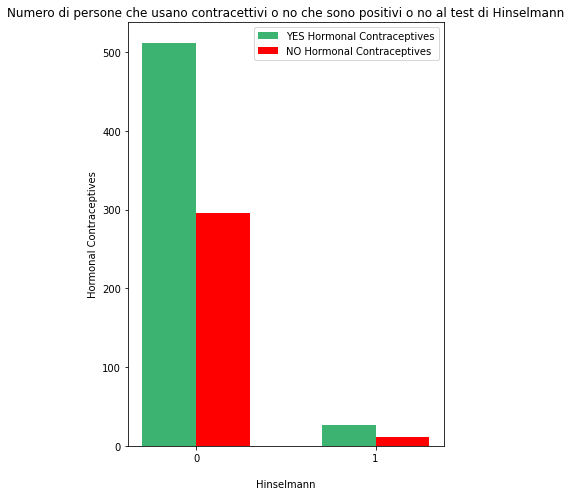

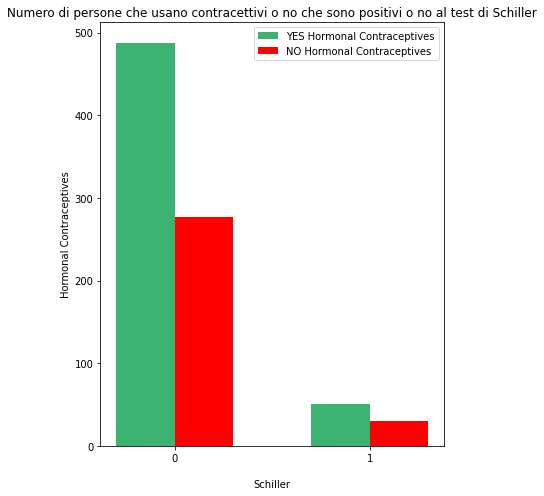

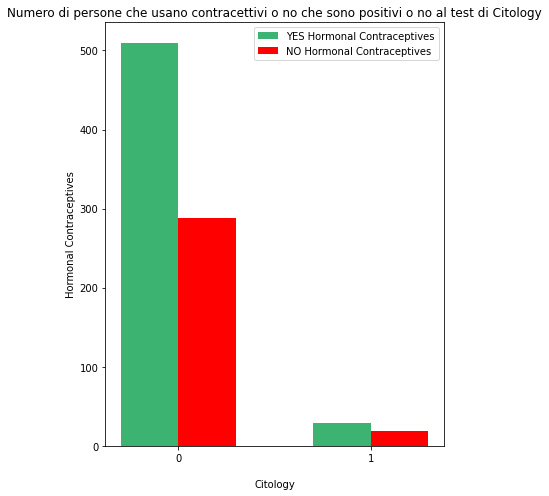

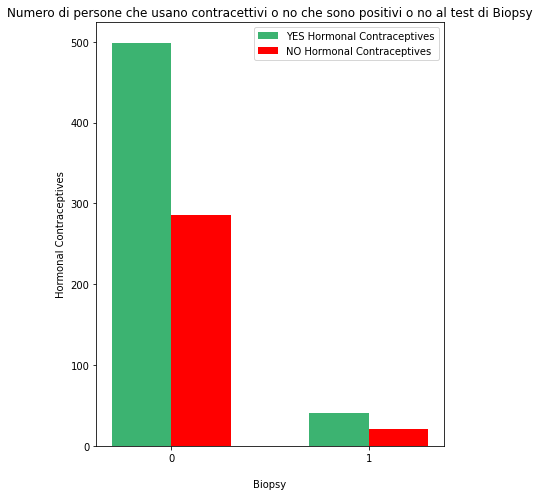

In [ ]:
for category in category_df:
  hormonal2test(df, category)

In [ ]:
def pieplot_test(df, test_name, col1, col2):
  test_0 = len(df[df['%s' % test_name] == 0])
  test_1 = len(df[df['%s' % test_name] == 1])

  labelsTestName = ['%s = 0' % test_name, '%s = 1' % test_name]
  sizesTestName = [test_0, test_1]

  plt.rcParams['figure.figsize'] = (7,7)
  plt.pie(sizesTestName, 
          radius=0.7, 
          startangle = 0,
          colors=['%s' % col1, '%s' % col2],
          autopct='%.2f%%', 
          textprops={'fontsize': 13.5},
          pctdistance=0.69)
  plt.legend(labelsTestName, loc=(0.85, 0.7), fontsize = 15)
  plt.title('%s Test' % test_name, fontsize = 25)
  plt.show()

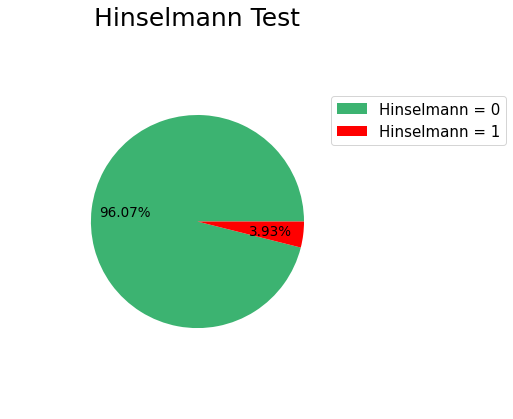

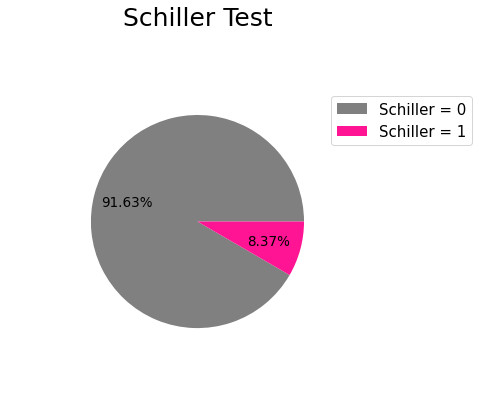

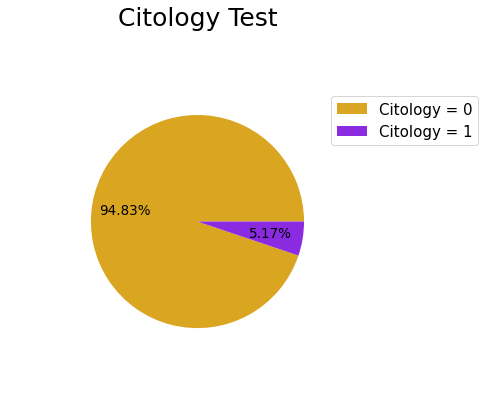

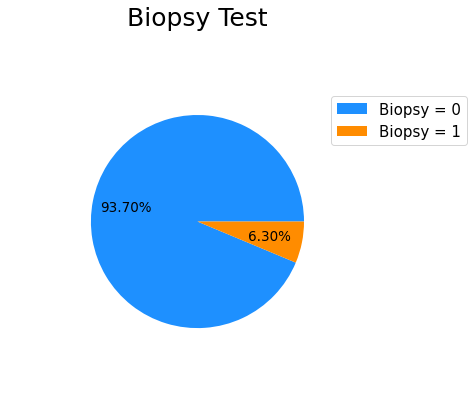

In [ ]:
pieplot_test(df, 'Hinselmann', 'mediumseagreen', 'red')
pieplot_test(df, 'Schiller', 'grey', 'deeppink')
pieplot_test(df, 'Citology', 'goldenrod', 'blueviolet')
pieplot_test(df, 'Biopsy', 'dodgerblue', 'darkorange')

In [ ]:
def hc_test(df, test, x, col1, col2):
  cont = len(df[(df['Hormonal Contraceptives'] == 1) & (df['%s' %test] == x)])
  notcont = len(df[(df['Hormonal Contraceptives'] == 0) & (df['%s' %test] == x)])

  labelsCont = ['YES Hormonal Contraceptives', 'NO Hormonal Contraceptives']
  sizesCont = [cont, notcont]
  plt.rcParams['figure.figsize'] = (7,7)
  plt.pie(sizesCont, 
          radius=0.7, 
          startangle = 0,
          colors=['%s' %col1,'%s' %col2],
          autopct='%.2f%%', 
          textprops={'fontsize': 13.5},
          pctdistance=0.69)
  plt.legend(labelsCont, loc=(0.85, 0.7), fontsize = 15)
  plt.title('%s' %test + ' = ' + '%i' %x, fontsize = 25)
  plt.show()

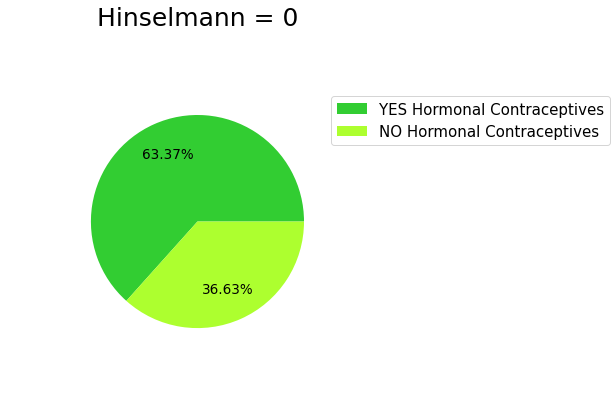

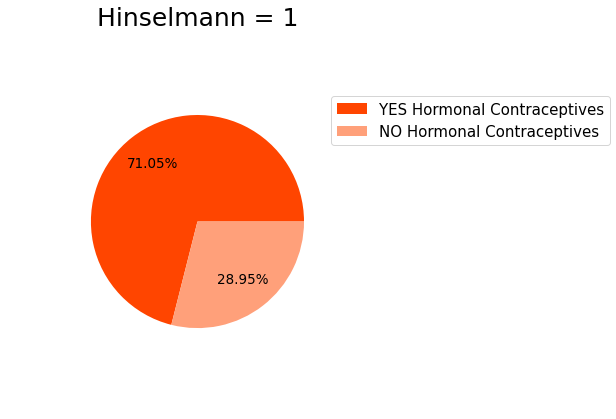

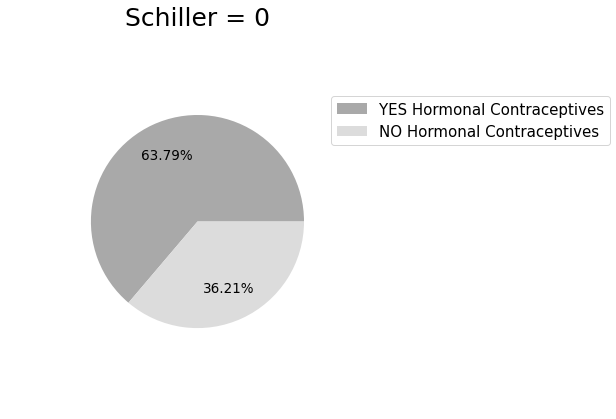

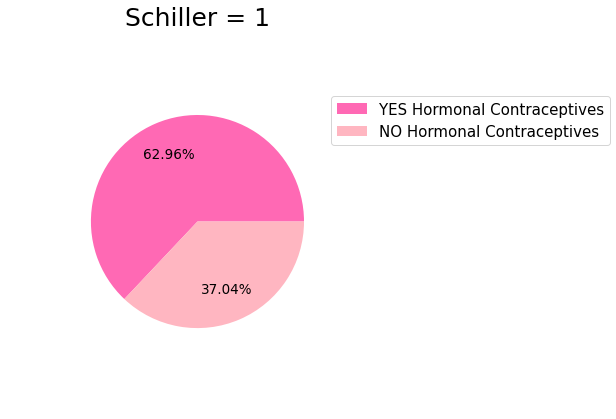

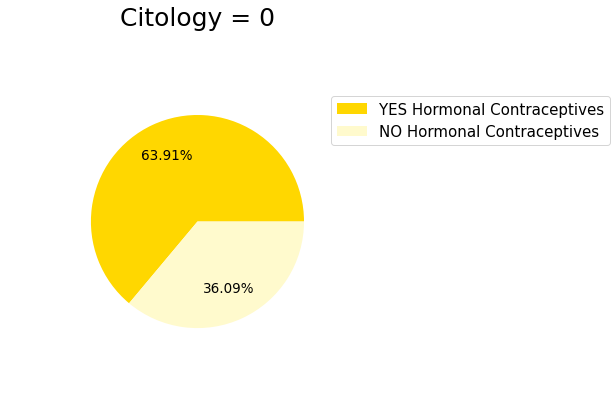

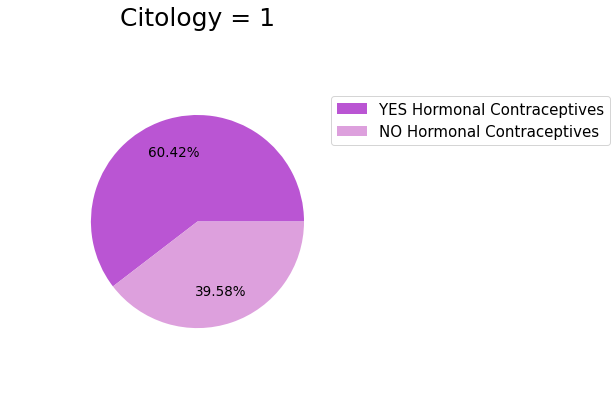

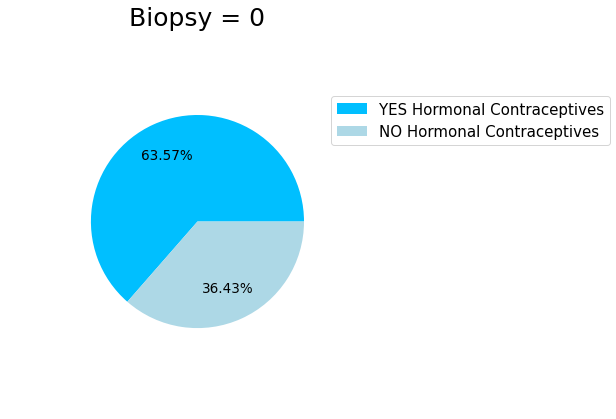

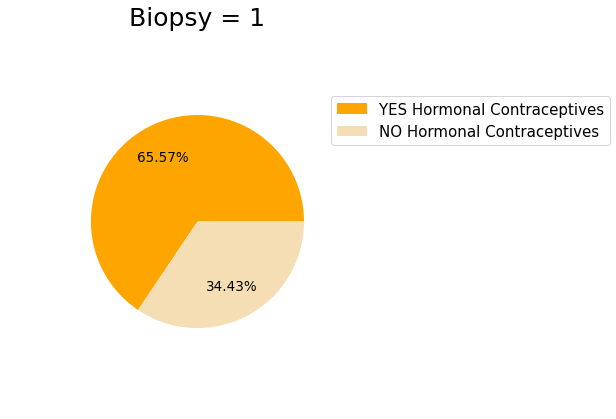

In [ ]:
hc_test(df, 'Hinselmann', 0, 'limegreen', 'greenyellow')
hc_test(df, 'Hinselmann', 1, 'orangered', 'lightsalmon')

hc_test(df, 'Schiller', 0, 'darkgrey', 'gainsboro')
hc_test(df, 'Schiller', 1, 'hotpink', 'lightpink')

hc_test(df, 'Citology', 0, 'gold', 'lemonchiffon')
hc_test(df, 'Citology', 1, 'mediumorchid', 'plum')

hc_test(df, 'Biopsy', 0, 'deepskyblue', 'lightblue')
hc_test(df, 'Biopsy', 1, 'orange', 'wheat')

###4) Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


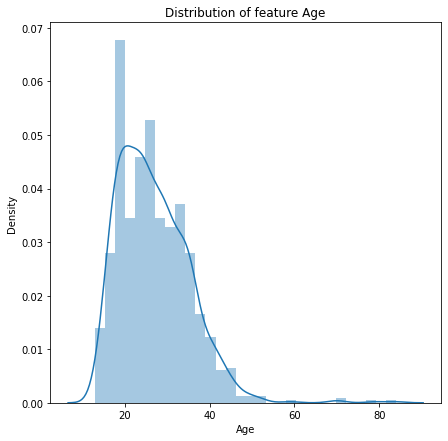

In [ ]:
sns.distplot(df['Age'])
plt.title('Distribution of feature Age')
plt.show()

Age of the Women facing the risk of Cervical cancer AxesSubplot(0.125,0.125;0.775x0.755)


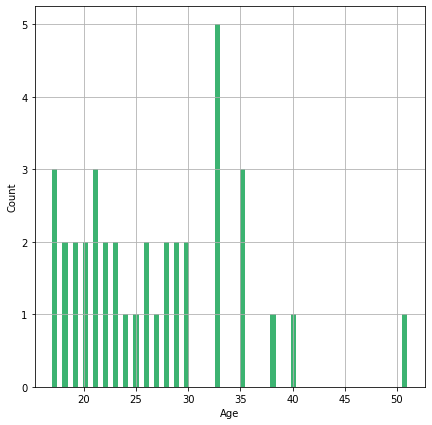

In [ ]:
df_hinselmann = df[df['Hinselmann'] == 1]
plt.xlabel('Age')
plt.ylabel('Count')
print('Age of the Women facing the risk of Cervical cancer', df_hinselmann['Age'].hist(bins=70, color = 'mediumseagreen'))

Age of the Women facing the risk of Cervical cancer AxesSubplot(0.125,0.125;0.775x0.755)


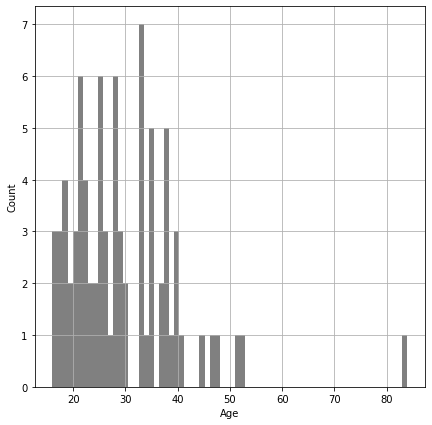

In [ ]:
df_schiller = df[df['Schiller'] == 1]
plt.xlabel('Age')
plt.ylabel('Count')
print('Age of the Women facing the risk of Cervical cancer', df_schiller['Age'].hist(bins=70, color = 'grey'))

Age of the Women facing the risk of Cervical cancer AxesSubplot(0.125,0.125;0.775x0.755)


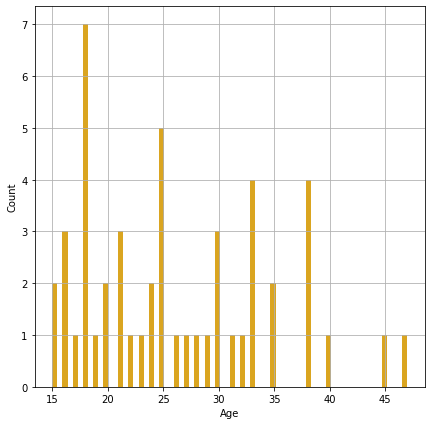

In [ ]:
df_citology = df[df['Citology'] == 1]
plt.xlabel('Age')
plt.ylabel('Count')
print('Age of the Women facing the risk of Cervical cancer', df_citology['Age'].hist(bins=70, color = 'goldenrod'))

Age of the Women facing the risk of Cervical cancer AxesSubplot(0.125,0.125;0.775x0.755)


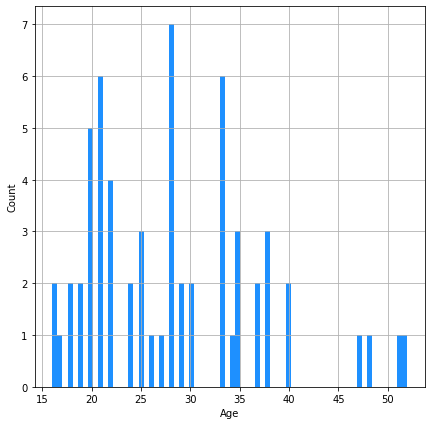

In [ ]:
df_biopsy = df[df['Biopsy'] == 1]
plt.xlabel('Age')
plt.ylabel('Count')
print('Age of the Women facing the risk of Cervical cancer', df_biopsy['Age'].hist(bins=70, color = 'dodgerblue'))

Age of the Women facing the risk of Cervical cancer AxesSubplot(0.125,0.125;0.775x0.755)


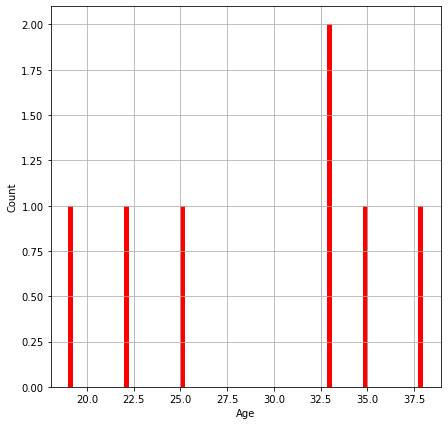

In [ ]:
df_all = df[(df['Hinselmann'] == 1) & (df['Schiller'] == 1) & (df['Citology'] == 1) & (df['Biopsy'] == 1)]
plt.xlabel('Age')
plt.ylabel('Count')
print('Age of the Women facing the risk of Cervical cancer', df_all['Age'].hist(bins=70, color = 'red'))

Age of the Women facing the risk of Cervical cancer AxesSubplot(0.125,0.125;0.775x0.755)


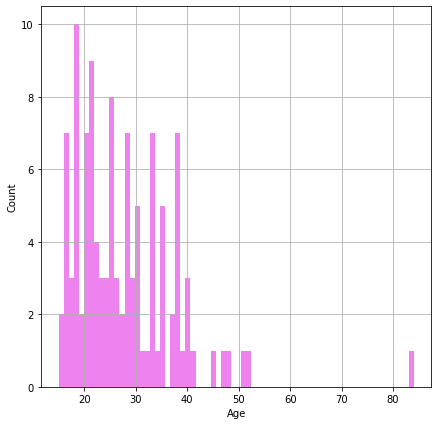

In [ ]:
df_one = df[(df['Hinselmann'] == 1) | (df['Schiller'] == 1) | (df['Citology'] == 1) | (df['Biopsy'] == 1)]
plt.xlabel('Age')
plt.ylabel('Count')
print('Age of the Women facing the risk of Cervical cancer', df_one['Age'].hist(bins=70, color = 'violet'))

###5) Drop attributi correlati

####5.1) Smoke

In [ ]:
#df['Smokes (packs/year)'] = df['Smokes (packs/year)'].convert_objects(convert_numeric=True)
print('Correlation between Smokes and Smokes (years) feature:',df['Smokes'].corr(df['Smokes (years)']))
print('Correlation between Smokes and Smokes (packs/year) feature:',df['Smokes'].corr(df['Smokes (packs/year)']))
print('Correlation between Smokes (years) and Smokes (packs/year) feature:',df['Smokes (years)'].corr(df['Smokes (packs/year)']))

Correlation between Smokes and Smokes (years) feature: 0.7320284448494178
Correlation between Smokes and Smokes (packs/year) feature: 0.5014607420179206
Correlation between Smokes (years) and Smokes (packs/year) feature: 0.7240141818948213


In [ ]:
## removing the smokes column from the dataframe.
df = df.drop('Smokes',axis=1)

In [ ]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:genital herpes,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Cervical Cancer
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0


Dalle tre colonne/features (Smokes, Smokes (years), Smokes (packs/year)) si può rimuovere la colonna Smokes poiché la colonna Smokes ha valori diversi da zero solo quando anche la colonna Smokes (years) ha valori diversi da zero.
Infatti, la predizione dipende più da quanti anni la persona fuma piuttosto che se questa fuma o no.

In [ ]:
smokes_table = pd.crosstab(index=df["Schiller"], columns=(df["Smokes (years)"]))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


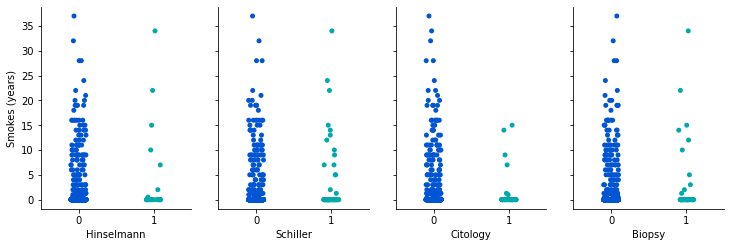

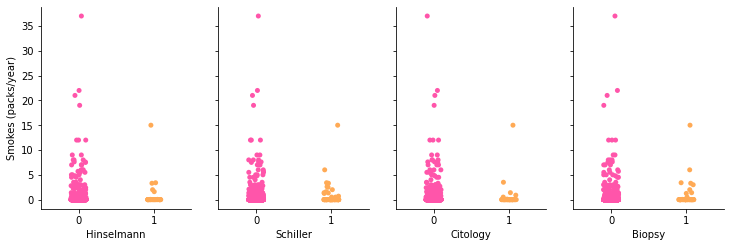

In [ ]:
g = sns.PairGrid(df,
                 y_vars=['Smokes (years)'],
                 x_vars= category_df,
                 aspect=.75, size=3.5)
g.map(sns.stripplot, palette="winter");

g = sns.PairGrid(df,
                 y_vars=['Smokes (packs/year)'],
                 x_vars= category_df,
                 aspect=.75, size=3.5)
g.map(sns.stripplot, palette="spring");

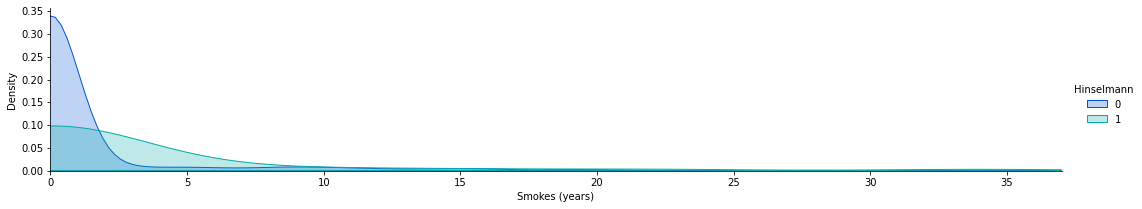

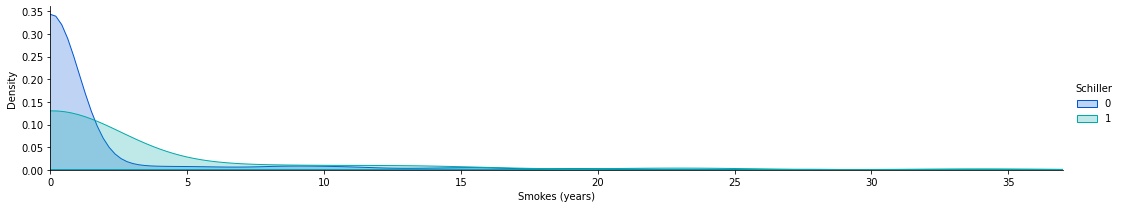

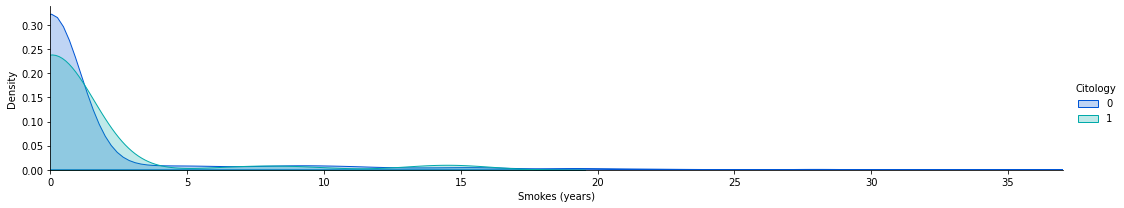

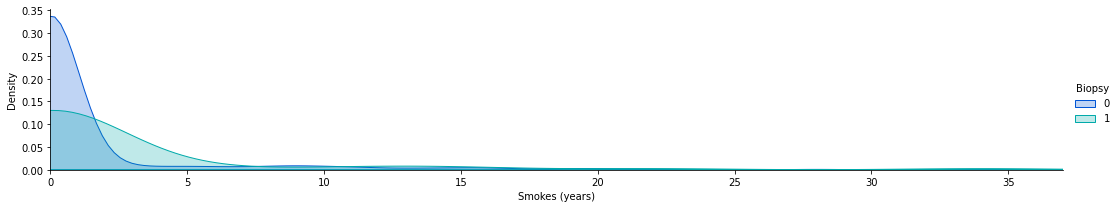

In [ ]:
for feature in category_df:

 as_fig = sns.FacetGrid(df,hue=feature,aspect=5, palette = 'winter')

 as_fig.map(sns.kdeplot,'Smokes (years)',shade=True)

 oldest = df['Smokes (years)'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

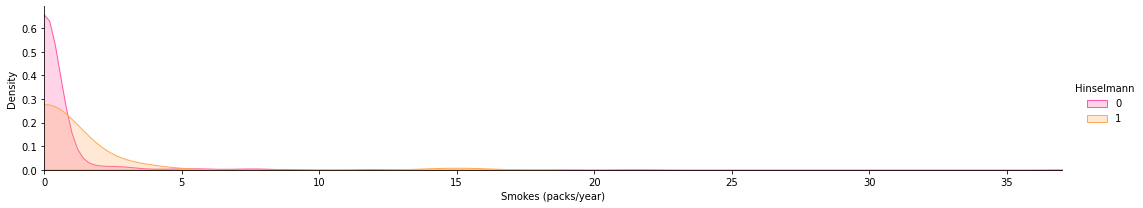

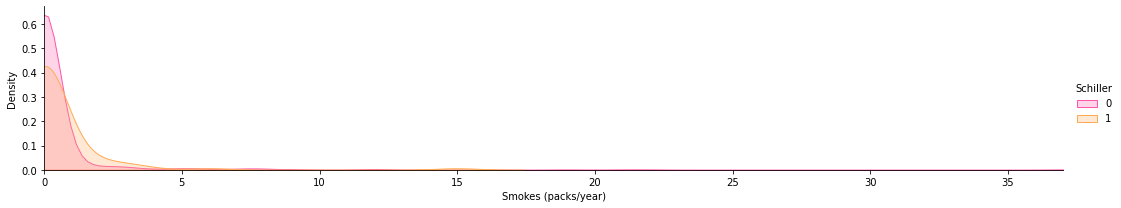

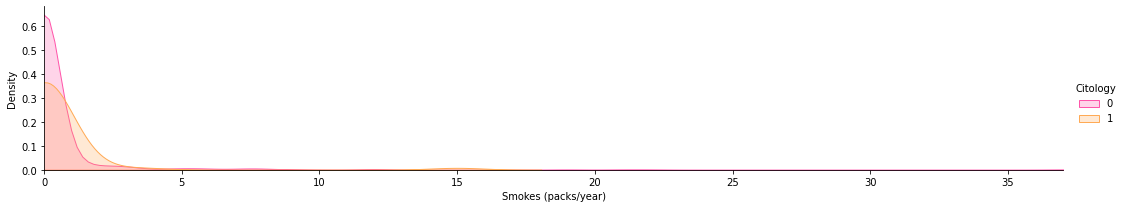

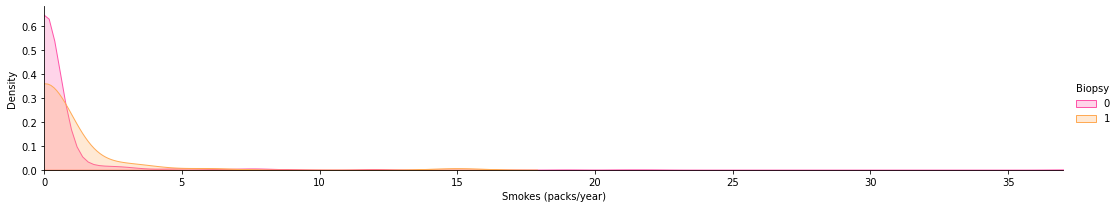

In [ ]:
for feature in category_df:

 as_fig = sns.FacetGrid(df,hue=feature,aspect=5, palette = 'spring')

 as_fig.map(sns.kdeplot,'Smokes (packs/year)',shade=True)

 oldest = df['Smokes (packs/year)'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

Dalla distribuzione dei dati nello scatter plot, i test di Schiller e quello della Biopsia mostrano che le donne che fumano da più di 5 anni hanno più possiilità di contrarre il tumore.

####5.2) Hormonal Contraceptives

In [ ]:
###Studio analogo si può fare per 'Hormonal Contraceptives' e 'Hormonal Contraceptives (years)'.
df = df.drop('Hormonal Contraceptives',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


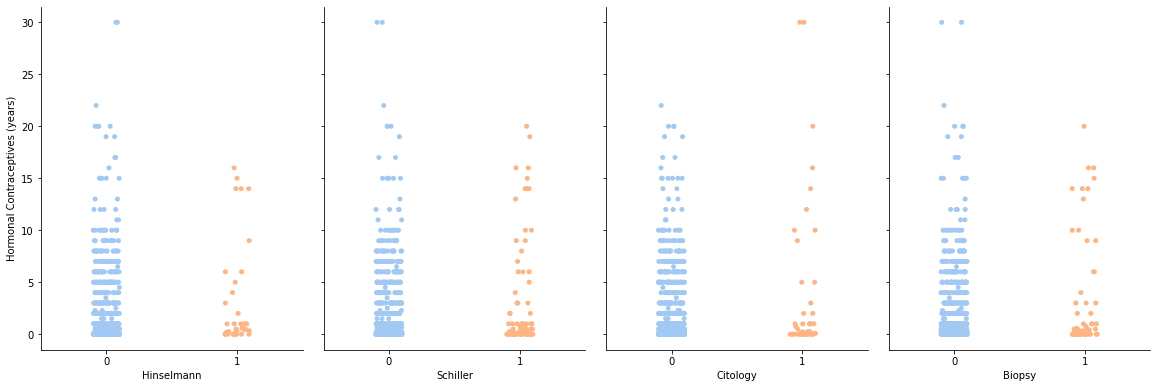

In [ ]:
g = sns.PairGrid(df,
                 y_vars=['Hormonal Contraceptives (years)'],
                 x_vars= category_df,
                 aspect=.75, size=5.5)
g.map(sns.stripplot, palette="pastel");

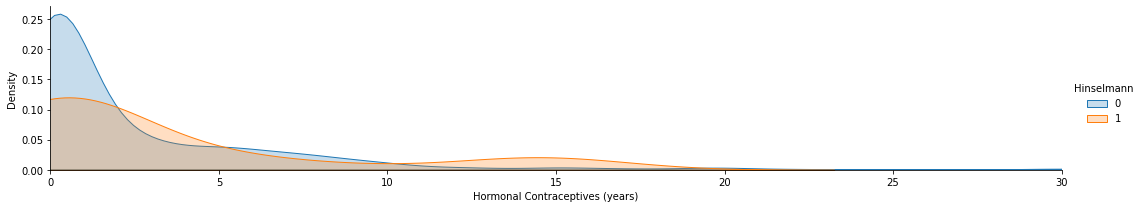

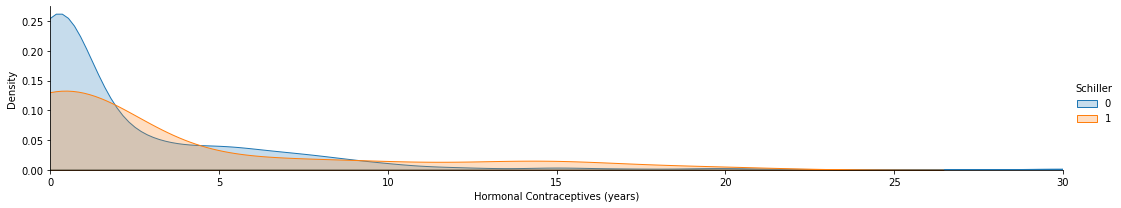

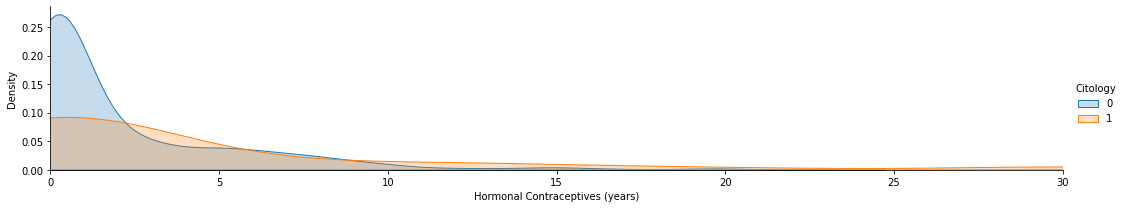

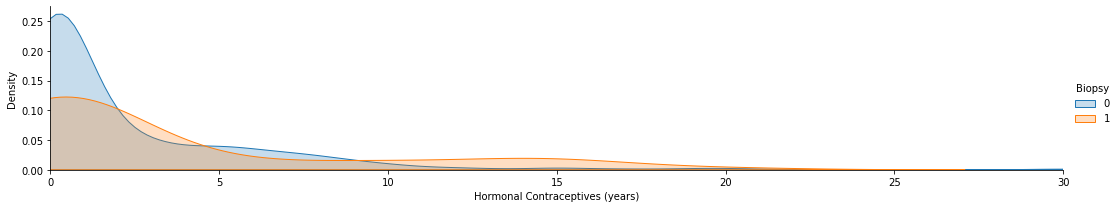

In [ ]:
for feature in category_df:

 as_fig = sns.FacetGrid(df,hue=feature,aspect=5)

 as_fig.map(sns.kdeplot,'Hormonal Contraceptives (years)',shade=True)

 oldest = df['Hormonal Contraceptives (years)'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

Le donne che hanno preso contraccettivi ormonali per più di 5 anni hanno un rischio maggiore di contrarre il cancro alla cervice dell'utero. I piccoli picchi tra i 10 e i 15 anni mostrano un rischio ancora più elevato rispetto alle donne che non hanno usato i contraccettivi. Il National Cancer Institute mostra degli studi a sostegno di questa affermazione; infatti, le donne che usano contraccettivi ormonali corrono un maggiore rischio di cancro alla cercice (cfr. https://www.cancer.gov/about-cancer/causes-prevention/risk/hormones/oral-contraceptives-fact-sheet#q6 ).
Questa, quindi, è una tra le feature più rilevanti e che può essere utilizzata per analisi ulteriori.

####5.3) IUD

In [ ]:
###Studio analogo si può fare per 'IUD' e 'IUD (years)'.
df = df.drop('IUD',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


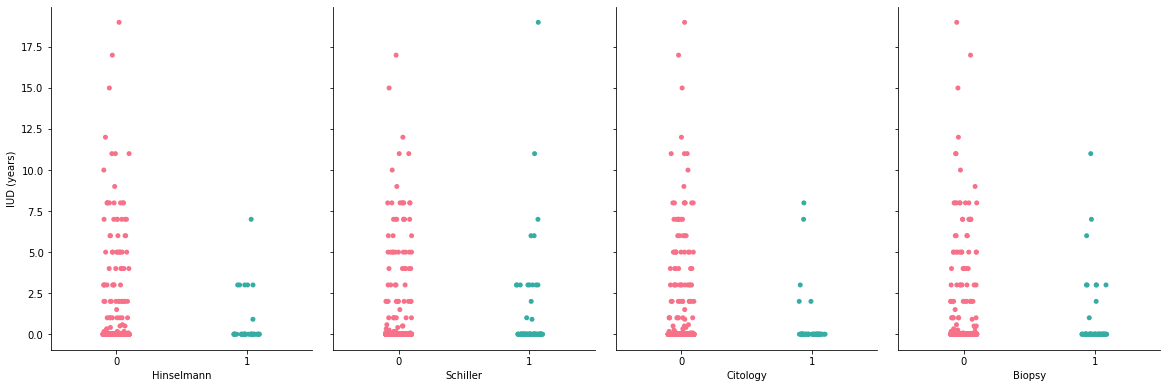

In [ ]:
g = sns.PairGrid(df,
                 y_vars=['IUD (years)'],
                 x_vars= category_df,
                 aspect=.75, size=5.5)
g.map(sns.stripplot, palette="husl");

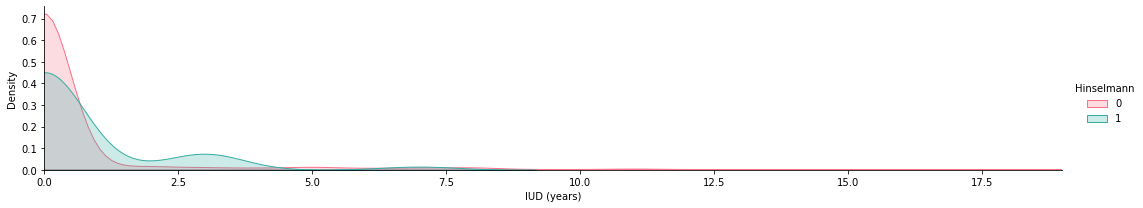

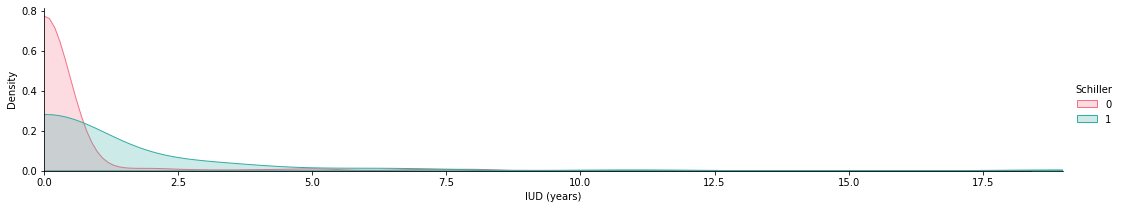

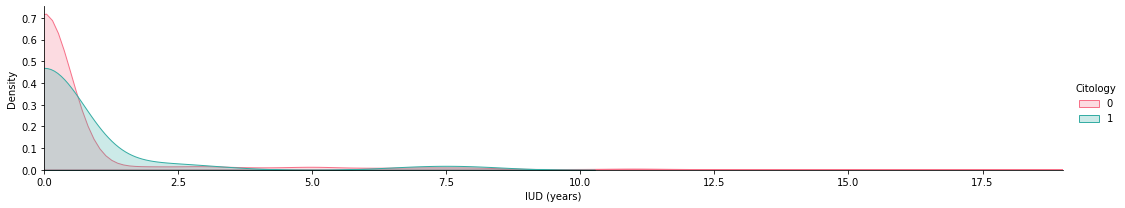

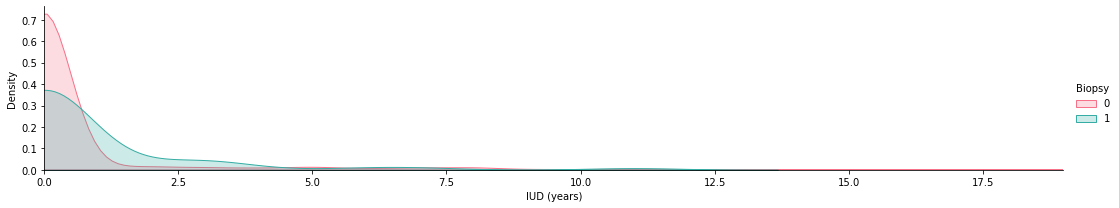

In [ ]:
for feature in category_df:

 as_fig = sns.FacetGrid(df,hue=feature,aspect=5, palette="husl")

 as_fig.map(sns.kdeplot,'IUD (years)',shade=True)

 oldest = df['IUD (years)'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

La distribuzione dei valori uguali zero (risultato negativo del test) mostra che se l'utilizzo dello IUD non comporta il cancro all'utero, quindi le donne che lo utilizzano hanno meno possibilità di essere a rischio, a prescindere dal numero di anni di utilizzo. Recenti studi affermano che le donne che usano IUD possono avere un rischio inferiore di cancro cervicale (cfr. https://www.livescience.com/60881-iuds-may-lower-risk-of-cervical-cancer.html). 

###6) count

In [ ]:
count1 = len(df[(df['Hinselmann'] == 1) & (df['Schiller'] == 1) & (df['Citology'] == 1) & (df['Biopsy'] == 1)])
print('Tutti 1: %i' %count1)

count2 = len(df[(df['Hinselmann'] == 0) & (df['Schiller'] == 0) & (df['Citology'] == 0) & (df['Biopsy'] == 0)])
print('Tutti 0: %i' %count2)

count3 = len(df[(df['Hinselmann'] == 0) & (df['Schiller'] == 0) & (df['Citology'] == 0) & (df['Biopsy'] == 1)])
print('Tutti 0 e Biopsy 1: %i' %count3)

count4 = len(df[(df['Hinselmann'] == 0) & (df['Schiller'] == 0) & (df['Citology'] == 1) & (df['Biopsy'] == 0)])
print('Tutti 0 e Citology 1: %i' %count4)

count5 = len(df[(df['Hinselmann'] == 0) & (df['Schiller'] == 1) & (df['Citology'] == 0) & (df['Biopsy'] == 0)])
print('Tutti 0 e Schiller 1: %i' %count5)

count6 = len(df[(df['Hinselmann'] == 1) & (df['Schiller'] == 0) & (df['Citology'] == 0) & (df['Biopsy'] == 0)])
print('Tutti 0 e Hinselmann 1: %i' %count6)

count7 = len(df[(df['Hinselmann'] == 1) & (df['Schiller'] == 1) & (df['Citology'] == 1) & (df['Biopsy'] == 0)])
print('Tutti 1 e Biopsy 0: %i' %count7)

Tutti 1: 7
Tutti 0: 855
Tutti 0 e Biopsy 1: 7
Tutti 0 e Citology 1: 23
Tutti 0 e Schiller 1: 15
Tutti 0 e Hinselmann 1: 1
Tutti 1 e Biopsy 0: 3


###7) test = 1 


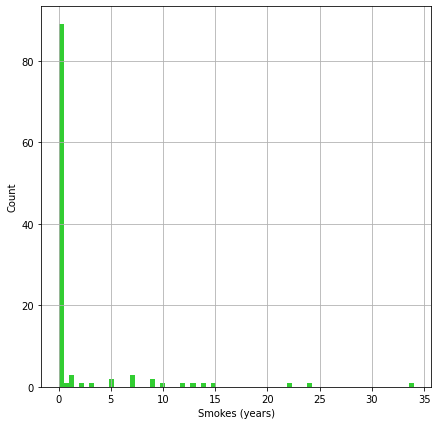

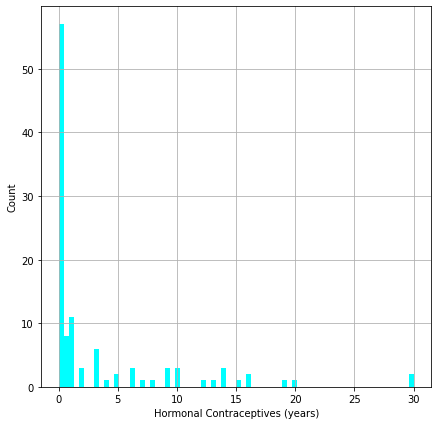

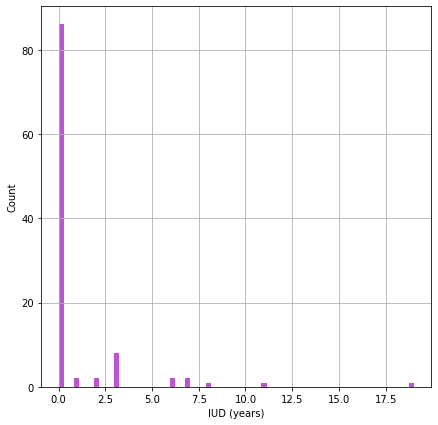

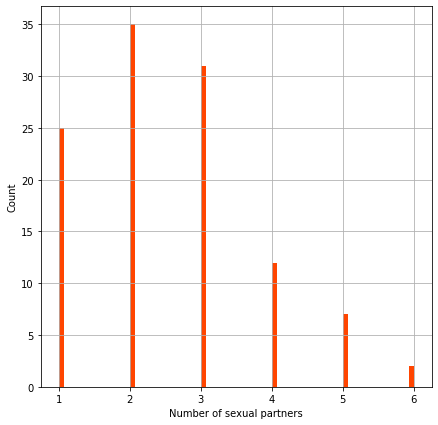

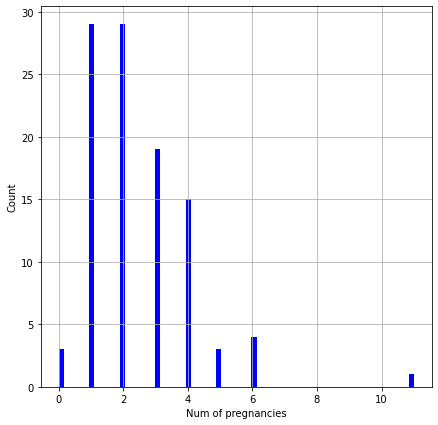

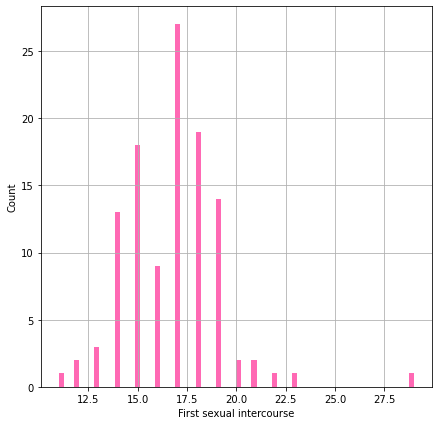

In [ ]:
def count(att, col):
  df_one = df[(df['Hinselmann'] == 1) | (df['Schiller'] == 1) | (df['Citology'] == 1) | (df['Biopsy'] == 1)]
  plt.xlabel('%s' %att)
  plt.ylabel('Count')
  plt.show(df_one['%s' %att].hist(bins=70, color = '%s' %col))
  #print('%s' %att, df_smoke['%s' %att].hist(bins=70, color = 'mediumseagreen'))
count('Smokes (years)','limegreen')
count('Hormonal Contraceptives (years)','aqua')
count('IUD (years)','mediumorchid')
count('Number of sexual partners','orangered')
count('Num of pregnancies','blue')
count('First sexual intercourse','hotpink')

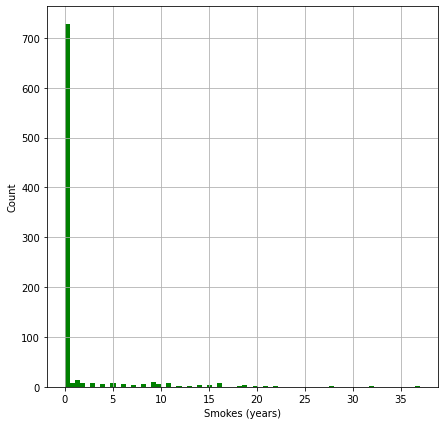

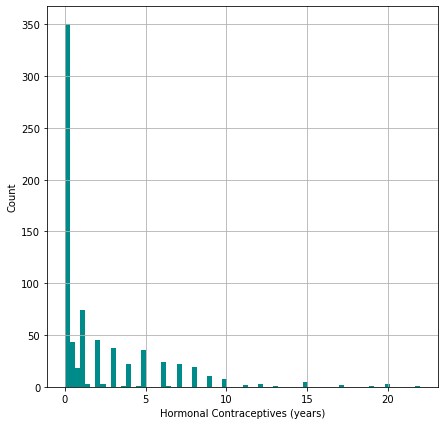

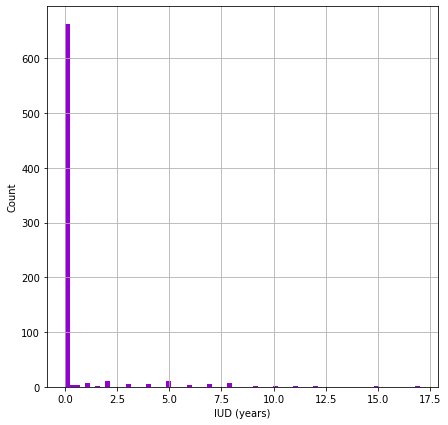

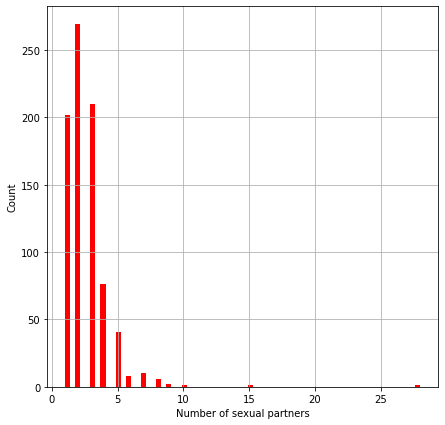

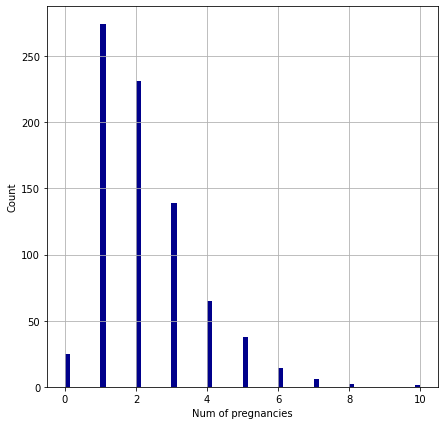

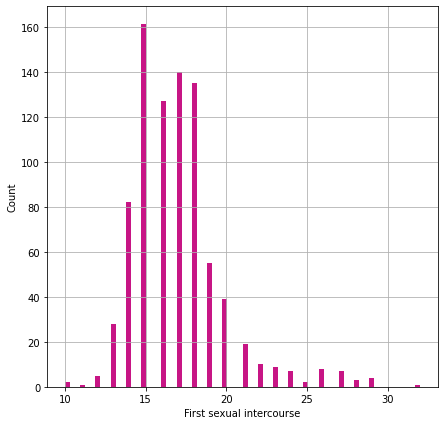

In [ ]:
def count(att, col):
  df_one = df[(df['Hinselmann'] == 0) & (df['Schiller'] == 0) & (df['Citology'] == 0) & (df['Biopsy'] == 0)]
  plt.xlabel('%s' %att)
  plt.ylabel('Count')
  plt.show(df_one['%s' %att].hist(bins=70, color = '%s' %col))
  #print('%s' %att, df_smoke['%s' %att].hist(bins=70, color = 'mediumseagreen'))
count('Smokes (years)','green')
count('Hormonal Contraceptives (years)','darkcyan')
count('IUD (years)','darkviolet')
count('Number of sexual partners','red')
count('Num of pregnancies','darkblue')
count('First sexual intercourse','mediumvioletred')

#SALVATAGGIO

In [ ]:
df.to_csv("cervicalCancerCleaned.csv", index = False)